In [1]:
from scipy.interpolate import RegularGridInterpolator
import sys
import numpy as np
import netCDF4 as nc
from datetime import datetime as dt,timedelta
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

ERROR 1: PROJ: proj_create_from_database: Open of /home/ycheng/.conda/envs/cpc/share/proj failed


In [2]:
# A = xr.open_dataset('/data/ycheng/JRA/Data/2003/surf_2003.nc')
ds0 = nc.Dataset('/data/ycheng/JRA/Data/2003/surf_2003.nc')
# print(ds0.variables)

In [3]:
t2m = ds0['t2m']
lats = ds0['latitude'][:]
lons = ds0['longitude'][:]
binsize = 2.5
new_lats = np.arange(90,-91,-binsize)
new_lons = np.arange(0,360,binsize)
print(lats.shape)
print(lons.shape)
print(t2m.shape)

(145,)
(288,)
(365, 145, 288)


In [6]:
new_lons_mesh,new_lats_mesh = np.meshgrid(new_lons,new_lats)
print(new_lons_mesh)
print(new_lons_mesh.shape)
print(new_lats_mesh)
print(new_lats_mesh.shape)
print(lats)
print(lons)

[[  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 ...
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]
 [  0.    2.5   5.  ... 352.5 355.  357.5]]
(73, 144)
[[ 90.   90.   90.  ...  90.   90.   90. ]
 [ 87.5  87.5  87.5 ...  87.5  87.5  87.5]
 [ 85.   85.   85.  ...  85.   85.   85. ]
 ...
 [-85.  -85.  -85.  ... -85.  -85.  -85. ]
 [-87.5 -87.5 -87.5 ... -87.5 -87.5 -87.5]
 [-90.  -90.  -90.  ... -90.  -90.  -90. ]]
(73, 144)
[ 90.    88.75  87.5   86.25  85.    83.75  82.5   81.25  80.    78.75
  77.5   76.25  75.    73.75  72.5   71.25  70.    68.75  67.5   66.25
  65.    63.75  62.5   61.25  60.    58.75  57.5   56.25  55.    53.75
  52.5   51.25  50.    48.75  47.5   46.25  45.    43.75  42.5   41.25
  40.    38.75  37.5   36.25  35.    33.75  32.5   31.25  30.    28.75
  27.5   26.25  25.    23.75  22.5   21.25  20.    18.75  17.5   16.25
  15.    13.75  12.5   11.

In [11]:
def interp(lats,lons,new_lats,new_lons,data_daily):
    new_lons,new_lats = np.meshgrid(new_lons,new_lats)
    interp_interior = RegularGridInterpolator((lats,lons),data_daily)
    out = interp_interior((new_lats,new_lons))
    # new_lons,new_lats = np.meshgrid(new_lons,new_lats)
    # interp_interior = RegularGridInterpolator((lons,lats),data_daily)
    # out = interp_interior((new_lons,new_lats))
    return out
interpolated = np.array([interp(lats, lons, new_lats, new_lons, var_day) for var_day in t2m])



In [6]:
# fig = plt.figure()
# ax = plt.axes(projection=ccrs.PlateCarree())
# plt.imshow(t2m[100])
# (ax=ax,transform=ccrs.PlateCarree(),levels= contour_levels)
# plt.show()

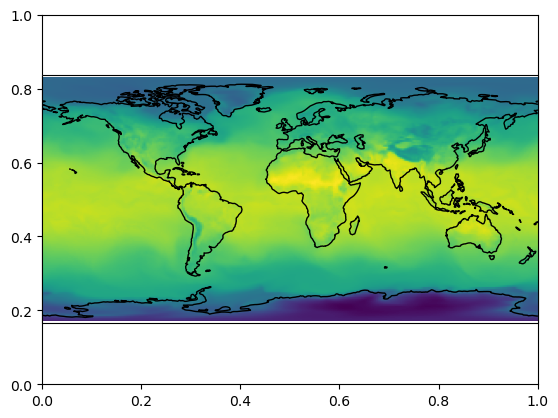

In [13]:
contour_levels = np.arange(270,312,3)

fig, ax = plt.subplots()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.imshow(t2m[100], extent=[0, 360, -90, 90])
ax.coastlines()

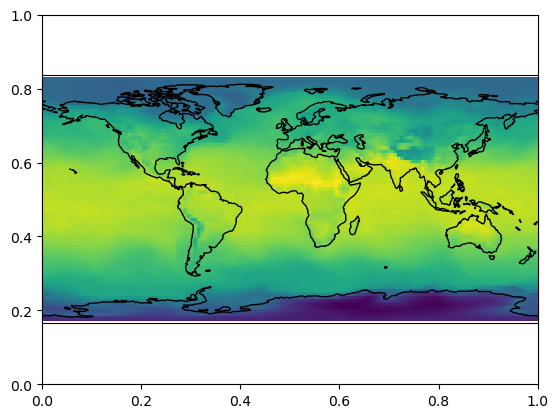

In [14]:
fig2, ax2 = plt.subplots()
ax2 = plt.axes(projection=ccrs.PlateCarree())
ax2.imshow(interpolated[100], extent=[0, 360, -90, 90])
ax2.coastlines()

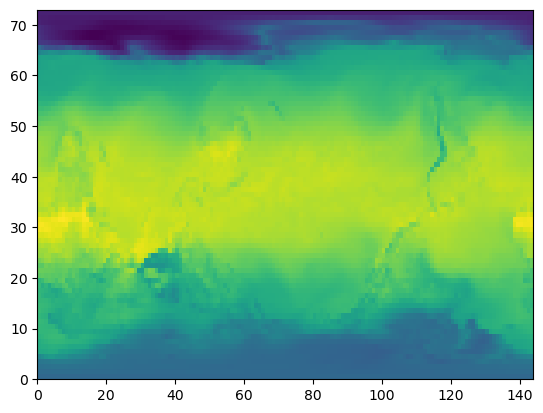

In [17]:
plt.pcolormesh(interpolated[100])

In [ ]:
plt.pcolormesh(t2m[100])